In [146]:
#install.packages("readxl", repos="http://cran.us.r-project.org/")
#install.packages("xlsx", lib='/home/sunil/anaconda3/lib/R/library/',repos="http://cran.us.r-project.org/")
#install.packages("xlsx", dependencies = TRUE)
#library("xlsx")
#install.packages('readxl','/home/sunil/anaconda3/lib/R/library/')

#to install in Conda  : conda install -c r r-readxl
library(readxl)
library(ggplot2)
library(scales)
library(lattice) 

In [147]:
#require(xlsReadWrite)
data <-read_excel("Data/NHLTop100.xlsx")
data_init <- data
#summary(data)
cat("\nnrows :",nrow(data))
cat("\nncols :",ncol(data))
#head(data)

#data cleaning
data <- data[!is.na(data$Player) & !is.na(data$GP) & !is.na(data$G) & !is.na(data$A),]
inputData <- data
data_init <- data
head(data)
cat("\nnrows :",nrow(data))
cat("\nncols :",ncol(data))


nrows : 100
ncols : 18

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602



nrows : 100
ncols : 18

## Graph after plotting

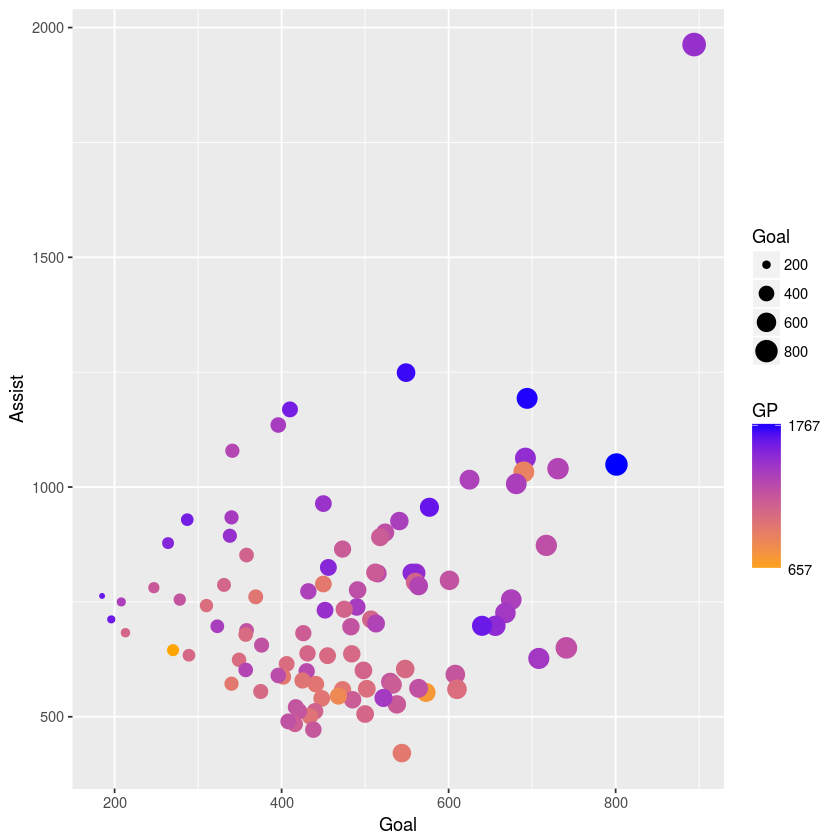

In [148]:
Assist <- data$A
Goal <- data$G
GP <- data$GP
p1<-ggplot(data,
       aes(y = Assist, x = Goal )) +
       geom_point(aes(color = GP, size = Goal))

p1 <-p1 + scale_color_continuous(name="GP",
                         breaks = c(657, 1767),
                         labels = c("657", "1767"),
                         low = "orange", high = "blue")

p1
plot<-p1


Call:
lm(formula = data$A ~ data$G)

Coefficients:
(Intercept)       data$G  
   494.5135       0.5202  



Call:
lm(formula = data$A ~ data$G)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
data$G        0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


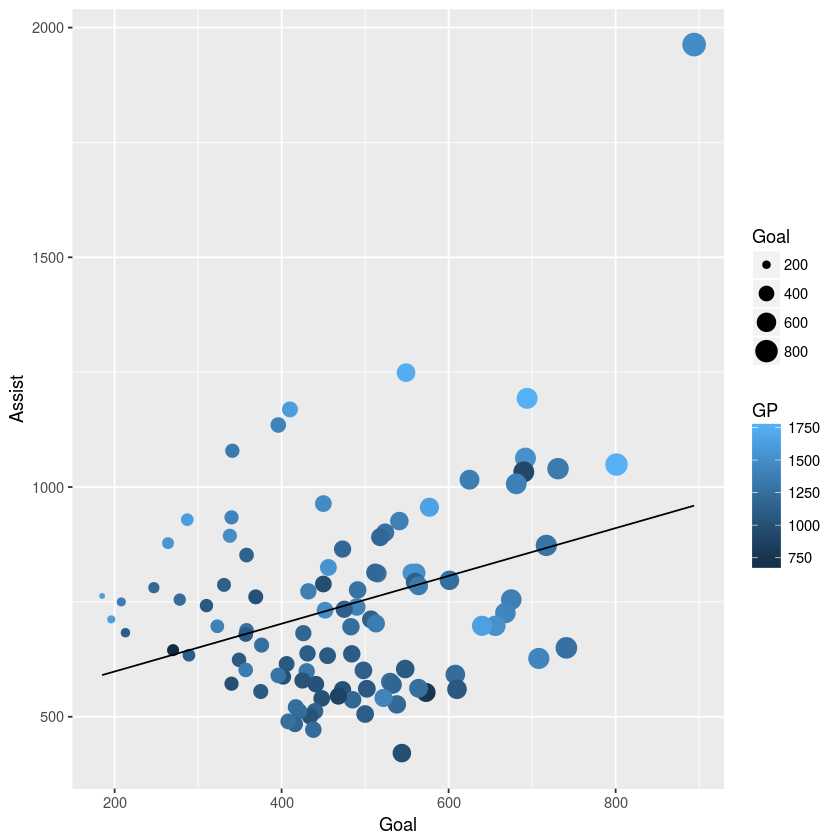


Call:
lm(formula = data$A ~ data$G + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
data$G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


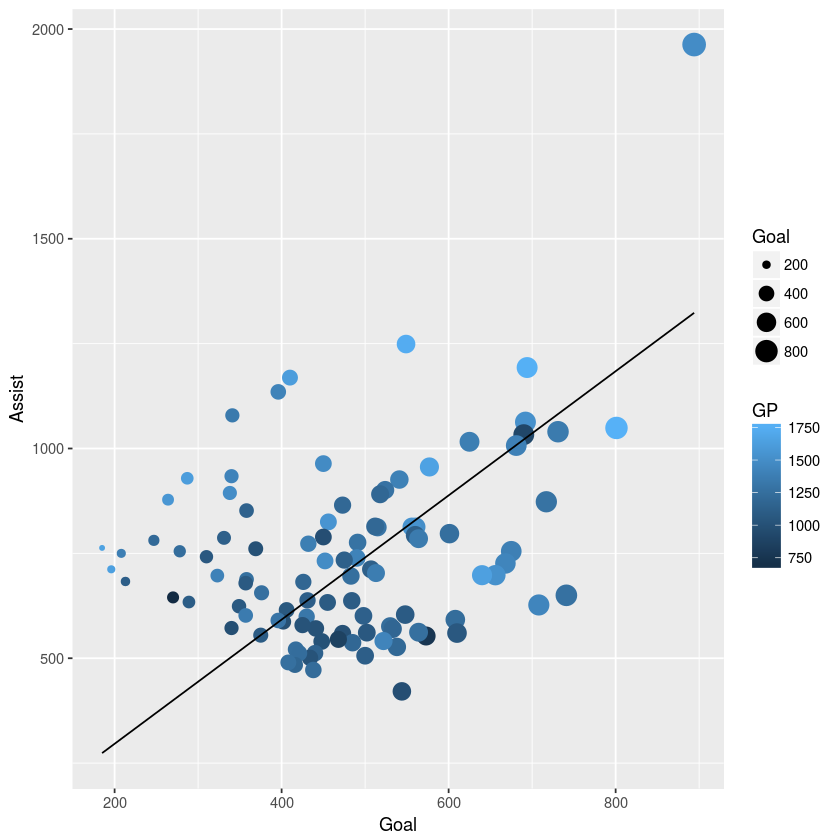

In [149]:
model <- lm (data$A~data$G)
model

#Initial model after fitting
data$pred.SC <- predict(lm(data$A ~ data$G), data=data)

p1<-ggplot(data,
       aes(y = Assist, x = Goal )) +
       geom_point(aes(color = GP, size = Goal)) + geom_line(aes(y = pred.SC))

#head(data)
p1
summary(lm(data$A ~ data$G), data=data)


#Initial model after fitting with the line passing through the origin
data$pred.SC <- predict(lm(data$A ~ data$G+0), data=data)

p1<-ggplot(data,
       aes(y = Assist, x = Goal )) +
       geom_point(aes(color = GP, size = Goal)) + geom_line(aes(y = pred.SC))

#head(data)
p1
summary(lm(data$A ~ data$G+0), data=data)
#+ abline(lm(Access~Goal, data=inputData), col='blue') 


In [150]:
#a. After the initial fitting, evaluate the fit by noting the R 2 and p values of the fit.
summary(model)


Call:
lm(formula = data$A ~ data$G)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
data$G        0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


## After the initial fitting
### R-squared:  0.09913
### p-value: 0.0008317

## After the initial fitting with the line passing through the Origin
## R-squared:  0.8972 
## p-value: < 2.2e-16


Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602
7,Mario Lemieux,NA,C,1984-1985,2005-2006,915,690,1033,1723,115,834,236,49,74,7,7,3633
8,Jaromir Jagr,NJD,R,1990-1991,2012-2013,1391,681,1007,1688,278,959,195,11,118,11,17,4881
9,Joe Sakic,NA,C,1988-1989,2008-2009,1378,625,1016,1641,30,614,205,32,86,13,7,4621
10,Phil Esposito,NA,C,1963-1964,1980-1981,1282,717,873,1590,197,910,249,23,118,NA,NA,NA


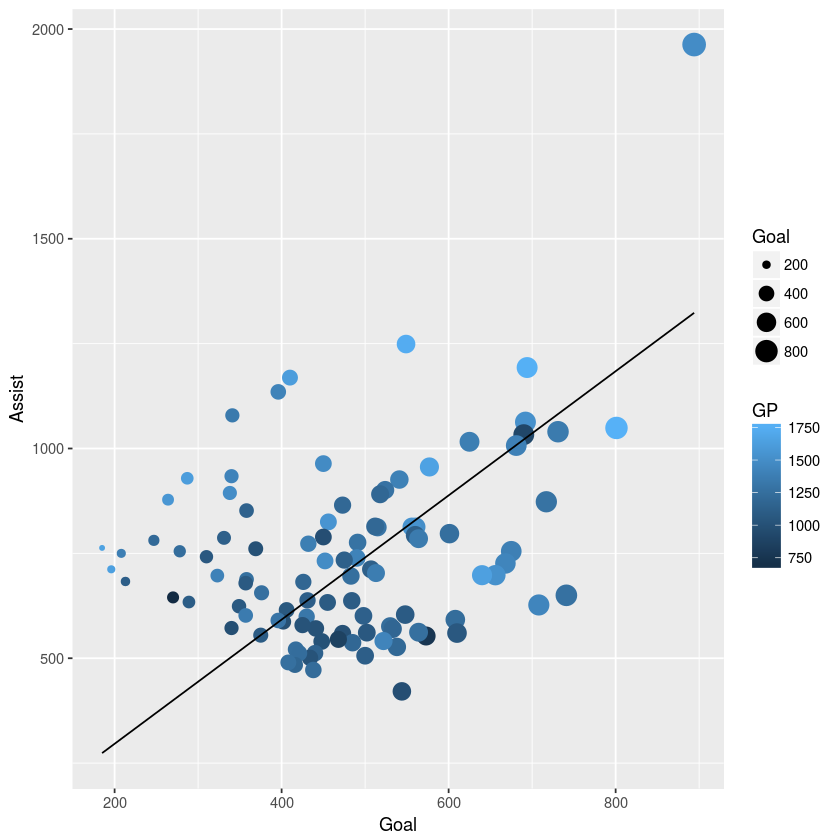

In [151]:
inputData
p1

## Model with the line forced through Wayne Gretzky


Call:
lm(formula = I(inputData$A - 1963) ~ I(inputData$G - 894) + 0, 
    data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
I(inputData$G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(inputData$A - 1963) ~ I(inputData$G - 894), data = inputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1003.4220    66.4463 -15.101  < 2e-16 ***
I(inputData$G - 894)     0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


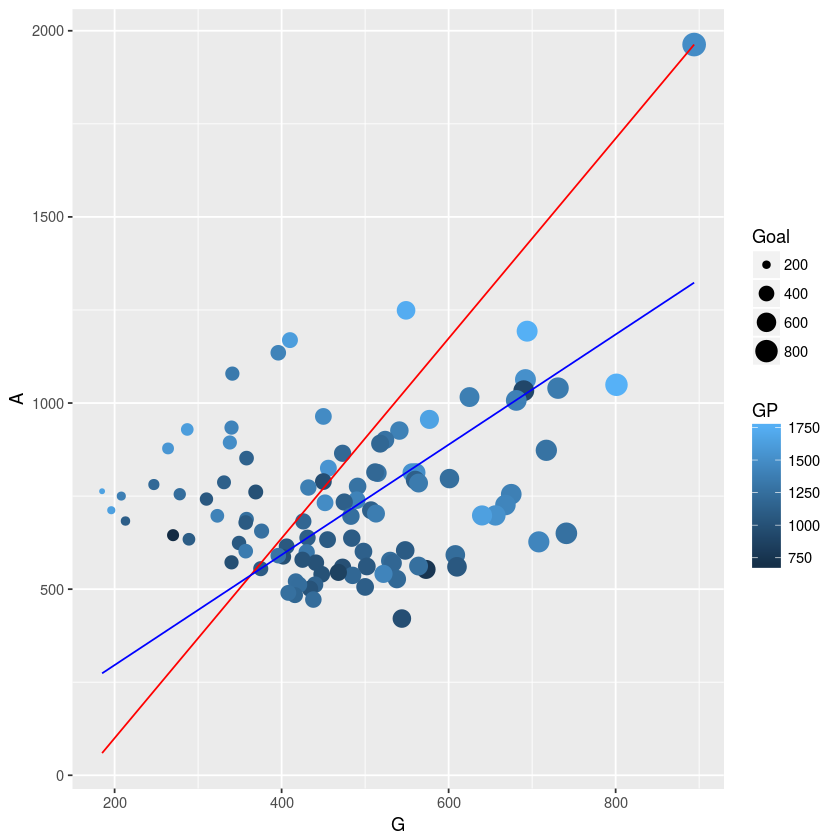

In [152]:
#b. Changing the model so that the line is forced through Wayne Gretzky. Noted the R 2 and p values of
#the fit. 
inputData <- data_init
#inputData$pred.SC <- predict(lm(I(inputData$A-1963) ~ I(inputData$G-894) +0, data=inputData))

#Model passing through Wayne Gretzky and the origin
inputData$pred.SC <- predict(lm(I(inputData$A-1963) ~ I(inputData$G-894)+0, data=inputData))
inputData$pred.SC <- inputData$pred.SC + 1963

p2 <- ggplot(inputData, aes(y = A, x = G))

p2 + geom_point(aes(color = GP, size = Goal)) +
  geom_line(aes(y = pred.SC),color="red") + geom_line(aes(y = data$pred.SC),color="blue") 

#data$pred.SC <- predict(lm(data$A ~ data$G), data=data)

summary(lm(I(inputData$A-1963) ~ I(inputData$G-894)+0, data=inputData))

#Summary for the line just passing through Wayne Gretzky
summary(lm(I(inputData$A-1963) ~ I(inputData$G-894), data=inputData))


## After the line is forced through Wayne Gretzky and Origin
## R-squared:  0.9082 
## p-value: < 2.2e-16

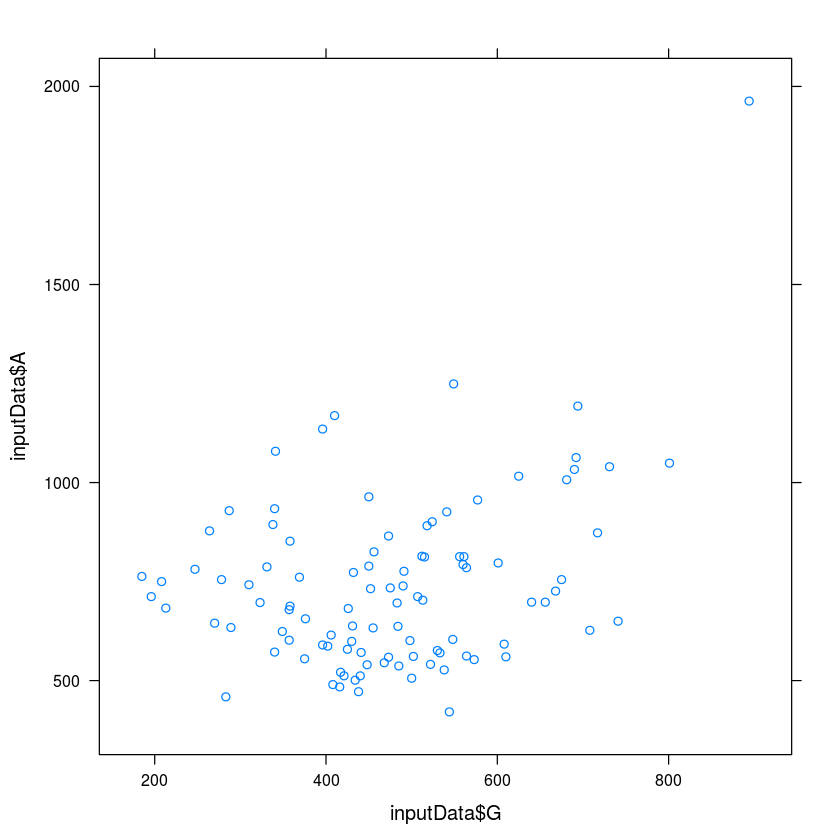


Call:
lm(formula = I(inputData$A) ~ I(inputData$G), data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    484.1218    73.5879   6.579 2.27e-09 ***
I(inputData$G)   0.5383     0.1492   3.608 0.000486 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486



Call:
lm(formula = I(inputData$A - 1963) ~ I(inputData$G - 894), data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -997.6100    66.0281 -15.109  < 2e-16 ***
I(inputData$G - 894)    0.5383     0.1492   3.608 0.000486 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486


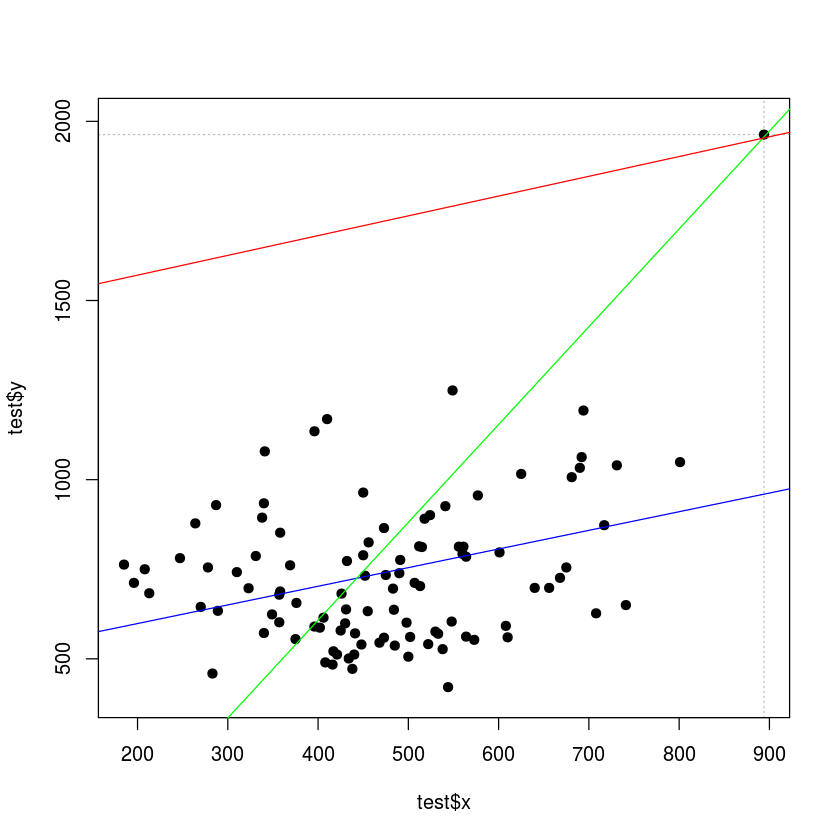

In [197]:
#Model passing through Wayne Gretzky and not origin Using the abline functionality.
#Using abline

#q <-894
#p <-1963
#q <-1
#p <-2.19

#inputData
xyplot(inputData$A~inputData$G,inputData)
test <- structure(list(x = inputData$G, y = inputData$A, .Names = c("Goal", "Assist")))
plot(test,pch=19,ylim=c(400,2000),panel.first=abline(h=c(0,1963),v=c(0,894),lty=3,col="gray"))
abline(lm(Assist~Goal, data=inputData), col='blue')

#nmod <- (lm(I(inputData$A-745)~I(inputData$G-894), inputData))
#abline(lm(I(inputData$A+540)~I(inputData$G-894), inputData), col='red')

#abline(-494.61,2.750,col='green')\
#Slope and Intercept calculated by the below method.
abline(-484.1218,2.73,col='green')

#nmod <- (lm(I(inputData$A-1963)~I(inputData$G-894) +0, inputData))
#abline(predict(nmod, newdata = list(x=0)), coef(nmod), col='red')

nmod <- (lm(I(inputData$A-480)~I(inputData$G-5) +0, inputData))
abline(predict(nmod, newdata = list(x=0))+970, coef(nmod), col='red')

#nmod <- (lm(I(inputData$A-475)~I(inputData$G-894), inputData))
#abline(predict(nmod, newdata = list(x=0))+970, coef(nmod), col='red')


#nmod <- (lm(I(inputData$A-1733)~I(inputData$G-894)+0, inputData))
#abline(predict(nmod, newdata = list(x=0)), coef(nmod), col='red')

#summary(lm(I(inputData$A-1963)~I(inputData$G-894)+0, inputData))
summary(lm(I(inputData$A)~I(inputData$G), inputData))
summary(lm(I(inputData$A-1963)~I(inputData$G-894), inputData))

### Method used for forcing the line through a specific point:
##### Calculated the summary() for the model.
##### Obtained the intercept from the summary for the model.
##### Using the formula y=mx+c, calculate the slope for the point (x,y) & intercept we obtained in above step.
##### Now we have the intercept and slope. Using these the line is drawn using the function abline(intercept,slope)




## After the line is forced through Wayne Gretzky
## R-squared:  0.09913 
## p-value: 0.0008317

# Model with the line forced through Patrick Kane

In [154]:
#c. Now add the data for another player Patrick Kane (he is a current player). You need to get the
#data for form online sources. Create a new chart with this addition and force the line through
#Kane but not Gretzky. Note R 2 and p values of the fit.

data_new <- data_init
#data_new

#New df with Patrick Kane added
data_new <- rbind(data_new, list(101,'Patrick Kane',NA,NA,NA,NA,as.numeric(730),as.numeric(283),as.numeric(459),742,83,282,NA,NA,NA,NA,NA,NA))
#data_new <- data_new.df
data_new  <- data_new[!is.na(data_new$Player) & !is.na(data_new$GP) & !is.na(data_new$G) & !is.na(data_new$A),]
#data_new


Call:
lm(formula = I(inputData$A - 459) ~ I(inputData$G - 283) + 0, 
    data = inputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.04 -112.70   40.16  168.10  801.60 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
I(inputData$G - 283)  1.14959    0.09765   11.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5767 
F-statistic: 138.6 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(inputData$A - 459) ~ I(inputData$G - 283), data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          177.4696    35.0920   5.057 1.96e-06 ***
I(inputData$G - 283)   0.5383     0.1492   3.608 0.000486 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486


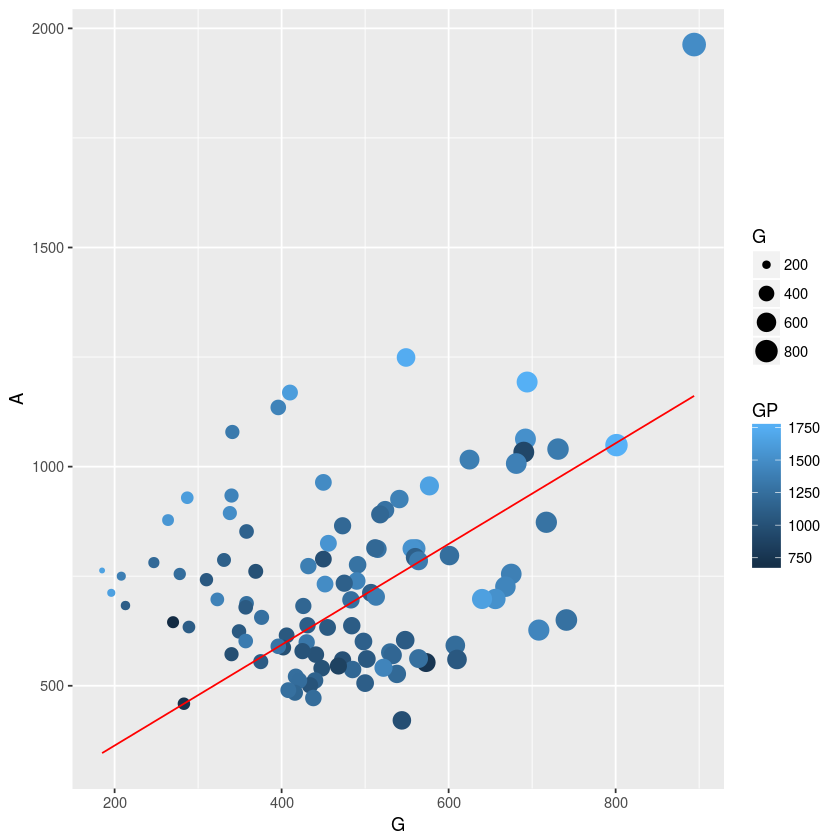

In [155]:
inputData <- data_new
#inputData$A
#inputData$G
#Model with the line passing through Patrick Kane and Origin
inputData$pred.SC <- predict(lm(I(inputData$A-459) ~ I(inputData$G-283)+0, data=inputData))
inputData$pred.SC <- inputData$pred.SC + 459

p3 <- ggplot(inputData, aes(y = A, x = G))

p3 + geom_point(aes(color = GP, size = G)) +
  geom_line(aes(y = pred.SC),color="red") 

#Summary for the line passing through Patrick Kane and Origin
summary(lm(I(inputData$A-459) ~ I(inputData$G-283)+0, data=inputData))

#Summary for the line passing through Patrick Kane and not origin
summary(lm(I(inputData$A-459) ~ I(inputData$G-283), data=inputData))

## After the line is forced through Patrick Kane and Origin
##  R-squared:  0.5767 
## p-value: < 2.2e-16


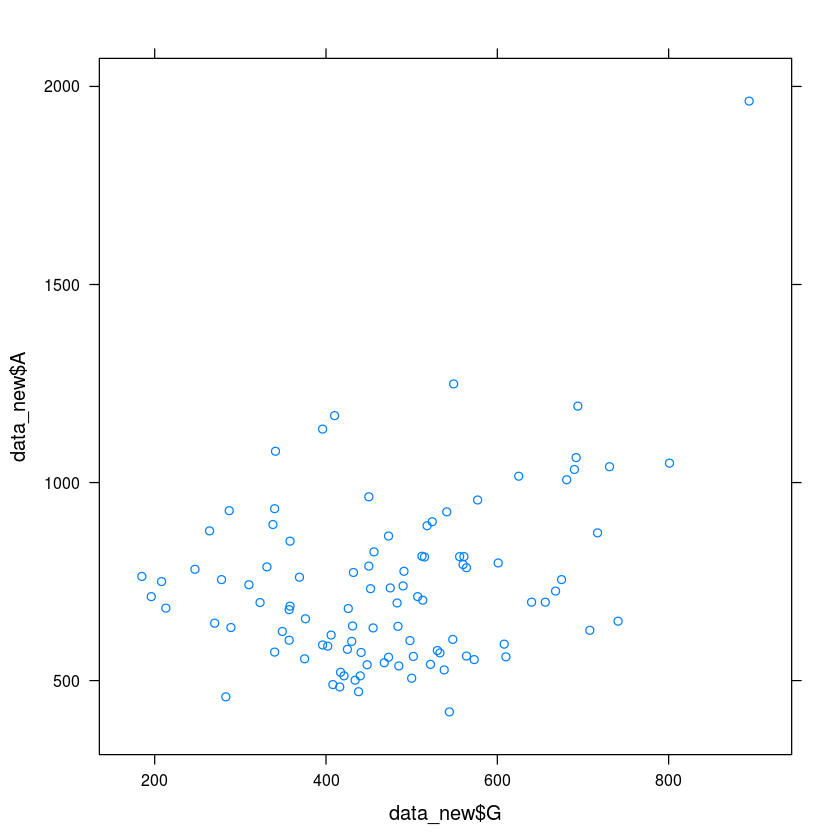


Call:
lm(formula = I(inputData$A + 459) ~ I(inputData$G + 283), data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          790.7741   114.7388   6.892 5.18e-10 ***
I(inputData$G + 283)   0.5383     0.1492   3.608 0.000486 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5.5304070,35.0920115,-0.1575973,0.875095103
I(data_new$G - 283),0.5383313,0.1492089,3.6079031,0.000486022


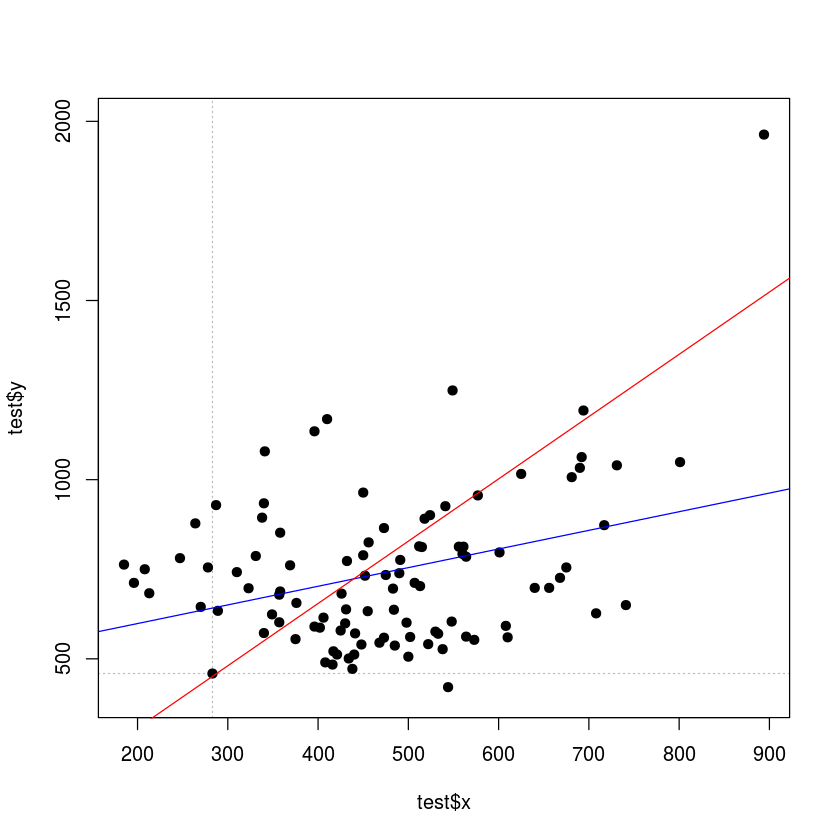

In [253]:
#Model passing through Patrick Kane and not origin
#xyplot(data_new$A ~ data_new$G,data_new)


xyplot(data_new$A~data_new$G,inputData)
test <- structure(list(x = data_new$G, y = data_new$A, .Names = c("Goal", "Assist")))
plot(test,pch=19,ylim=c(400,2000),panel.first=abline(h=c(0,459),v=c(0,283),lty=3,col="gray"))
abline(lm(Assist~Goal, data=data_new), col='blue')

#nmod <- (lm(I(data_new$A-642)~I(data_new$G-283)+0, data_new))
#abline(predict(nmod, newdat = list(x=0)), coef(nmod), col='red')
summary(lm(I(inputData$A+459)~I(inputData$G+283), inputData))
#summary(lm(I(inputData$A+26)~I(inputData$G+375), inputData))
#abline(lm(I(inputData$A+26)~I(inputData$G+375), inputData), col='red')

abline(-40.7741, 1.7383,col='red')
#abline(lm(I(y-459)~I(x-283) + 0, data=data_new), col="red")

#model <- lm(I(y-459)~I(x-283))
#summary(lm(308.2476, 0.5383))
coef(summary(lm(I(data_new$A-642)~I(data_new$G-283), data_new)))

#nmod <- (lm(I(inputData$A-205)~I(inputData$G-10) + 0, inputData))
#abline(predict(nmod, newdata = list(x=0)), coef(nmod), col='red')
#summary(nmod)


Call:
lm(formula = I(inputData$A + 459) ~ I(inputData$G + 283), data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          790.7741   114.7388   6.892 5.18e-10 ***
I(inputData$G + 283)   0.5383     0.1492   3.608 0.000486 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5.5304070,35.0920115,-0.1575973,0.875095103
I(data_new$G - 283),0.5383313,0.1492089,3.6079031,0.000486022


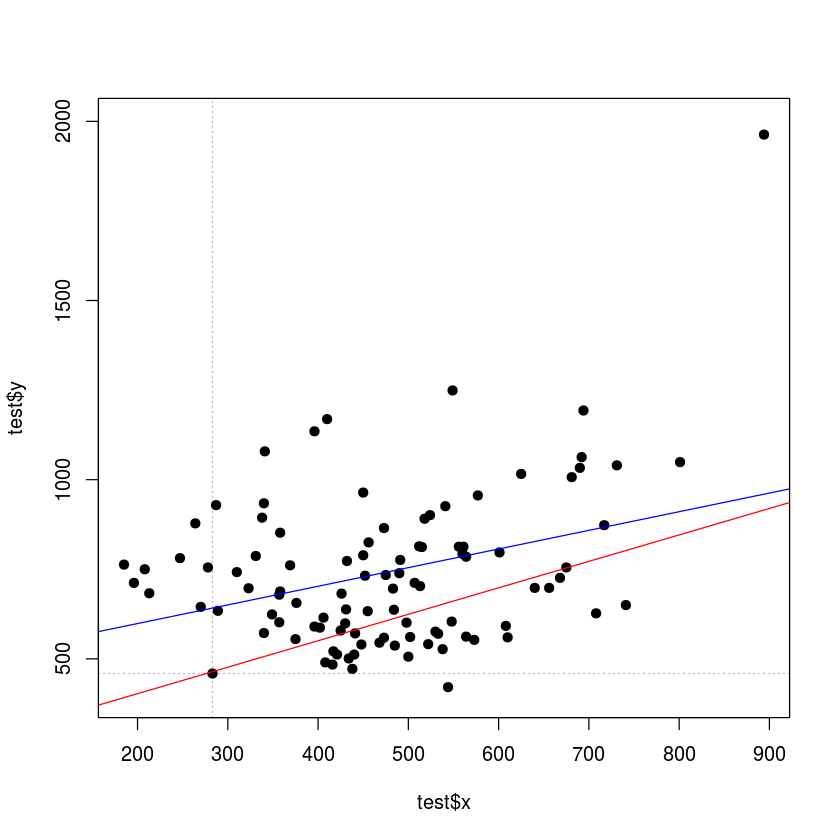

In [254]:
#Model passing through Patrick Kane and not origin
#xyplot(data_new$A ~ data_new$G,data_new)


#xyplot(data_new$A~data_new$G,inputData)
test <- structure(list(x = data_new$G, y = data_new$A, .Names = c("Goal", "Assist")))
plot(test,pch=19,ylim=c(400,2000),panel.first=abline(h=c(0,459),v=c(0,283),lty=3,col="gray"))
abline(lm(Assist~Goal, data=data_new), col='blue')

#nmod <- (lm(I(data_new$A-642)~I(data_new$G-283)+0, data_new))
#abline(predict(nmod, newdat = list(x=0)), coef(nmod), col='red')
summary(lm(I(inputData$A+459)~I(inputData$G+283), inputData))
#summary(lm(I(inputData$A+26)~I(inputData$G+375), inputData))
#abline(lm(I(inputData$A+26)~I(inputData$G+375), inputData), col='red')

#Values obtained from intercept of the summary and the slop calculated by the formula y=mx+c
abline(255.2476, 0.7383,col='red')
#abline(lm(I(y-459)~I(x-283) + 0, data=data_new), col="red")

#model <- lm(I(y-459)~I(x-283))
#summary(lm(308.2476, 0.5383))
coef(summary(lm(I(data_new$A-642)~I(data_new$G-283), data_new)))

#nmod <- (lm(I(inputData$A-205)~I(inputData$G-10) + 0, inputData))
#abline(predict(nmod, newdata = list(x=0)), coef(nmod), col='red')
#summary(nmod)


Call:
lm(formula = I(inputData$A - 659) ~ I(inputData$G - 283), data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -22.5304    35.0920  -0.642 0.522332    
I(inputData$G - 283)   0.5383     0.1492   3.608 0.000486 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5.5304070,35.0920115,-0.1575973,0.875095103
I(data_new$G - 283),0.5383313,0.1492089,3.6079031,0.000486022


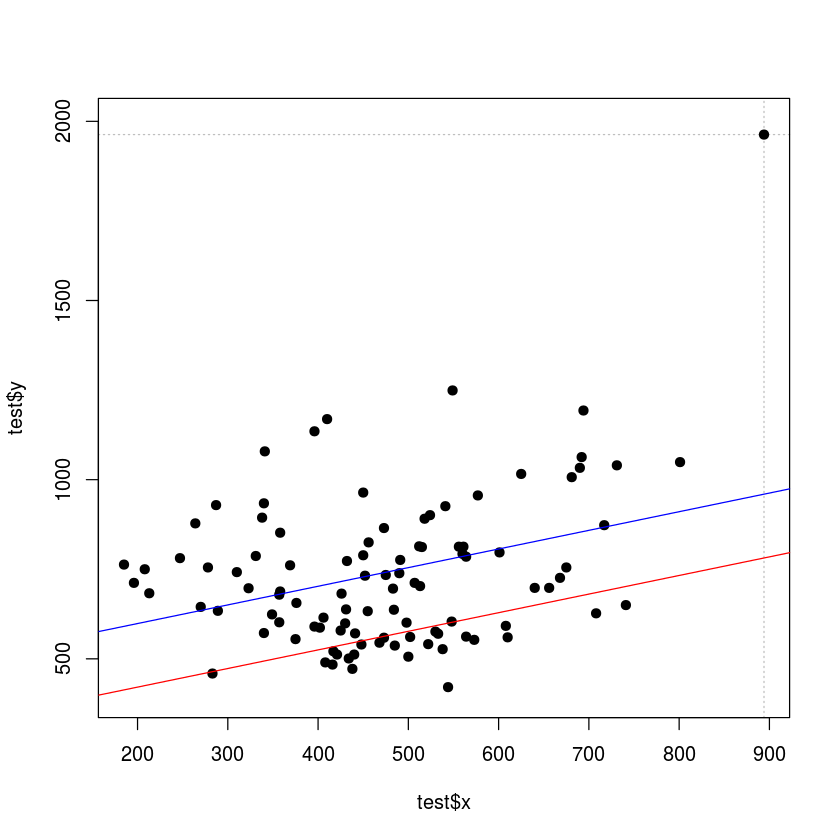

In [256]:
#xyplot(data_new$A~data_new$G,inputData)
test <- structure(list(x = data_new$G, y = data_new$A, .Names = c("Goal", "Assist")))
plot(test,pch=19,ylim=c(400,2000),panel.first=abline(h=c(0,1963),v=c(0,894),lty=3,col="gray"))
abline(lm(Assist~Goal, data=data_new), col='blue')

#nmod <- (lm(I(data_new$A+14)~I(data_new$G+658)+0, data_new))

#Ploting the line using the slop of the points
nmod <- (lm(I(data_new$A-642)~I(data_new$G-283)+0, data_new))
abline(predict(nmod, newdt = list(x=0)), coef(nmod), col='red')
summary(lm(I(inputData$A-659)~I(inputData$G-283), inputData))
#summary(lm(I(inputData$A+26)~I(inputData$G+375), inputData))
#abline(lm(I(inputData$A+26)~I(inputData$G+375), inputData), col='red')

#abline(308.2476, 0.5383,col='red')
#abline(lm(I(y-459)~I(x-283) + 0, data=data_new), col="red")

#model <- lm(I(y-459)~I(x-283))
#summary(lm(308.2476, 0.5383))
coef(summary(lm(I(data_new$A-642)~I(data_new$G-283), data_new)))

#nmod <- (lm(I(inputData$A-205)~I(inputData$G-10) + 0, inputData))
#abline(predict(nmod, newdata = list(x=0)), coef(nmod), col='red')
#summary(nmod)


## After the line is forced through Patrick Kane
## R-squared:  0.1073 
##  p-value: 0.000486


Call:
lm(formula = I(inputData$A - 1963) ~ I(inputData$G - 894) + 0, 
    data = inputData)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
I(inputData$G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = inputData$A ~ inputData$G + 0, data = inputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
inputData$G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


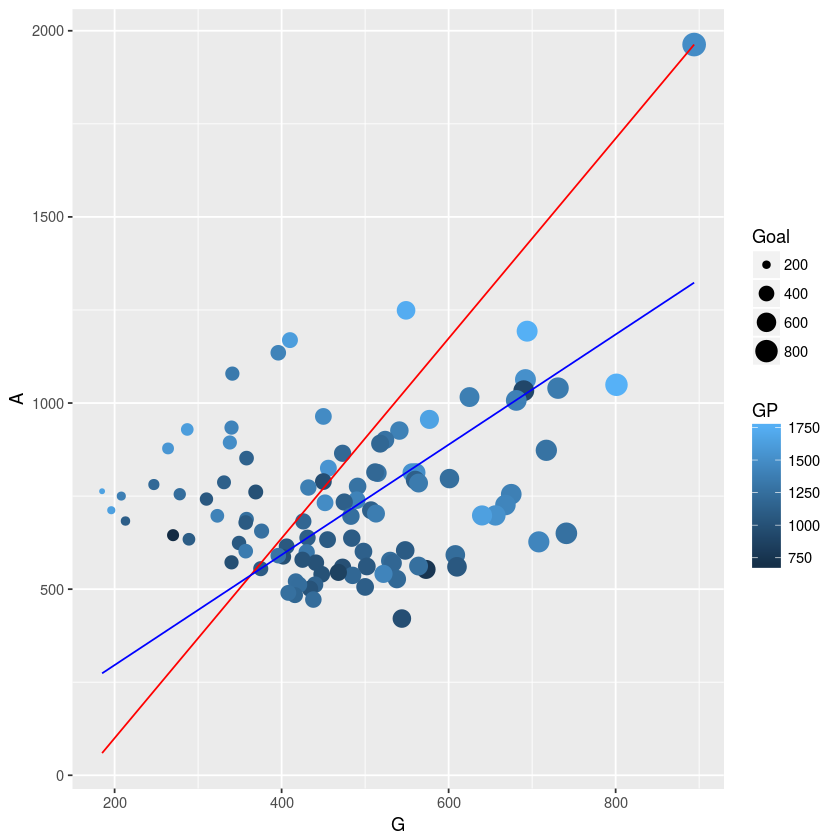


Call:
lm(formula = I(inputData$A - 459) ~ I(inputData$G - 283) + 0, 
    data = inputData)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.04 -112.70   40.16  168.10  801.60 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
I(inputData$G - 283)  1.14959    0.09765   11.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5767 
F-statistic: 138.6 on 1 and 100 DF,  p-value: < 2.2e-16


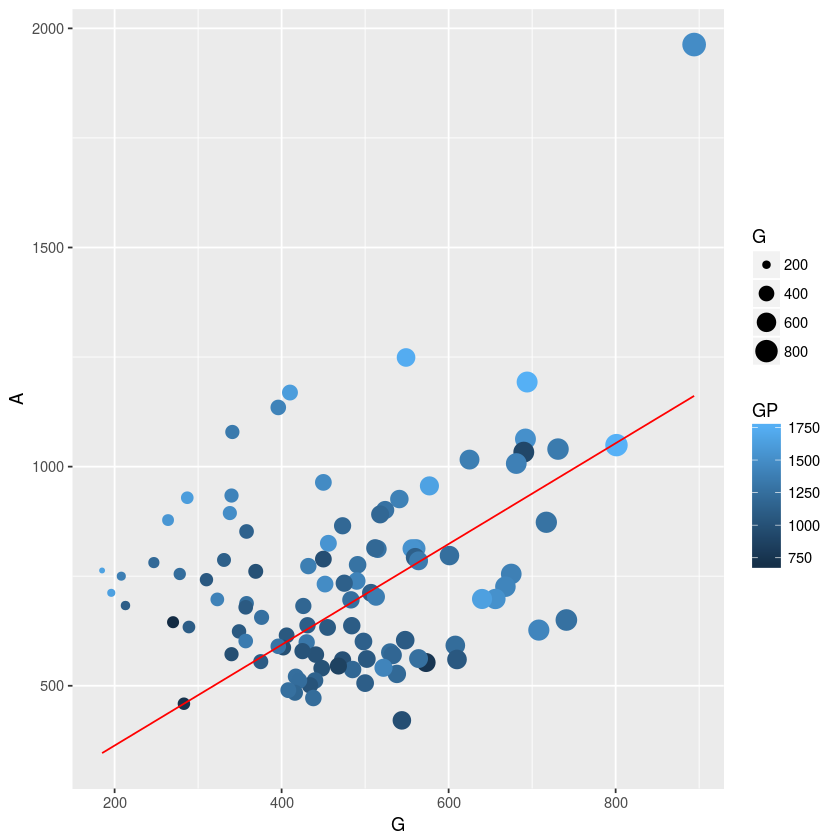

In [157]:
#d. Make all the model go through (0,0) and create new models. Note R 2 and p values of the fit.

#Model1 - Original model + passing through Wayne Gretzky
inputData <- data_init
inputData$pred.SC <- predict(lm(inputData$A ~ inputData$G+0, data=inputData))
#inputData$pred.SC <- inputData$pred.SC + 0

inputData$pred.SC2 <- predict(lm(I(inputData$A-1963) ~ I(inputData$G-894)+0, data=inputData))
inputData$pred.SC2 <- inputData$pred.SC2 + 1963

p2 <- ggplot(inputData, aes(y = A, x = G))

p2 + geom_point(aes(color = GP, size = Goal)) +
  geom_line(aes(y = inputData$pred.SC2),color="red") + geom_line(aes(y = inputData$pred.SC),color="blue") 

#data$pred.SC <- predict(lm(data$A ~ data$G), data=data)
summary(lm(I(inputData$A-1963) ~ I(inputData$G-894) + 0, data=inputData))
summary(lm(inputData$A ~ inputData$G + 0, data=inputData))

#Model2 - passing through Patrick Kane and Origin
inputData <- data_new

inputData$pred.SC <- predict(lm(I(inputData$A-459) ~ I(inputData$G-283) + 0, data=inputData))
inputData$pred.SC <- inputData$pred.SC + 459

p3 <- ggplot(inputData, aes(y = A, x = G))

p3 + geom_point(aes(color = GP, size = G)) +
  geom_line(aes(y = pred.SC),color="red") 

summary(lm(I(inputData$A-459) ~ I(inputData$G-283) + 0, data=inputData))

## After the line is forced through origin for Initial Model
## R-squared:  0.9082 
## p-value: < 2.2e-16

In [158]:
#e. Create a table of model names (reference), R 2 and p values of the fit. Interpret your results.
#ModelSummary$Model  <- "Initial Model"
#ModelSummary$R2     <- 0.09913
#ModelSummary$pvalue <- 0.0008317

#ModelSummary

#colnames(ModelSummary) <- c("Model","R-squared","p-value")

## Tabulating all the results:

|  Model |   R-squared|   p-value|
|---|---|---|
|  Initial Model |  0.09913  | 0.0008317  |
| Model Passing through  Wayne Gretzky  | 0.09913   |  0.0008317 |
|   Model Passing through Patrick Kane | 0.1073  |  0.000486 |
|  Initial Model Passing through Origin| 0.8972  | 2.2e-16  |
| Passing through Origin & Wayne Gretzky  | 0.9082    |   2.2e-16 |
|  Passing through Origin & Patrick Kane | 0.5767   |  2.2e-16|

 

In [159]:
#Model passing through Wayne Gretzky and not origin
#Using abline

#q <-894
#p <-1963
#q <-1
#p <-2.19

#inputData
#xyplot(inputData$A~inputData$G,inputData)
#test <- structure(list(x = inputData$G, y = inputData$A, .Names = c("Goal", "Assist")))
#plot(test,pch=19,ylim=c(400,2000),panel.first=abline(h=c(0,1963),v=c(0,894),lty=3,col="gray"))
#abline(lm(Assist~Goal, data=inputData), col='blue')

#nmod <- (lm(I(inputData$A-260)~I(inputData$G-10) +0, inputData))
#abline(predict(nmod, newdata = list(x=0))+200, coef(nmod), col='red')

#nmod <- (lm(I(inputData$A-480)~I(inputData$G-5) +0, inputData))
#abline(predict(nmod, newdata = list(x=0))+970, coef(nmod), col='red')

#nmod <- (lm(I(Access-1963)~I(Goal-894) +0, inputData))
#abline(predict(nmod, newdata = list(x=0))+1963, coef(nmod), col='red')


#summary(nmod)

In [160]:
#Model passing through Patrick Kane and not origin
#xyplot(data_new$A ~ data_new$G,data_new)


#xyplot(data_new$A~data_new$G,inputData)
#test <- structure(list(x = data_new$G, y = data_new$A, .Names = c("Goal", "Assist")))
#plot(test,pch=19,ylim=c(400,2000),panel.first=abline(h=c(0,1963),v=c(0,894),lty=3,col="gray"))
#abline(lm(Assist~Goal, data=data_new), col='blue')

#nmod <- (lm(I(data_new$A-642)~I(data_new$G-283) +0, data_new))
#abline(predict(nmod, newdat = list(x=0)), coef(nmod), col='red')

#abline(lm(I(y-459)~I(x-283) + 0, data=data_new), col="red")

#model <- lm(I(y-459)~I(x-283))
#summary(model)
#summary(nmod)

#nmod <- (lm(I(inputData$A-205)~I(inputData$G-10) + 0, inputData))
#abline(predict(nmod, newdata = list(x=0)), coef(nmod), col='red')
#summary(nmod)